# Table of content
- **Introduction**
- **Model building, training and testing**
    - *Model building*
    - *Model training*
    - *Model testing*
- **Results regression Neural Network**
    - *Mean Absolute Error*
    - *Loss curve*
    - *Other metrics*
- **Conclusion**

# Introduction 
This project is about creating an algorithm that would predict the detection of lung cancer based on CT scans. The algorithm would also predict what type of cancer is within the patient and the size of the tumor if applied.

In [1]:
%store -r df_sick_lungs_annot

In [2]:
# Import the necessary modules
# If you get a ModuleNotFoundError, use %pip install {module} to install the module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pydicom as dicom
from pathlib import Path
import time
from zipfile import ZipFile 
import cv2
from tqdm import tqdm
import glob
import tensorflow as tf
from tensorflow.data import Dataset
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score, recall_score, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import xmltodict
import functions_project
from sklearn.preprocessing import LabelBinarizer

Functions import succesfull


# Model building, training and testing
In this chapter, the model will be build and trained before it will be tested among the test data.


In [29]:
# Split the data for the regression using train_test_split
x_reg = np.array([np.array(val) for val in df_sick_lungs_annot.image_pixels])
y_reg = df_sick_lungs_annot.diff_squared_nor

# Split the data into a train and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size = 0.2, random_state = 42)

# Create the Dataset object to make it ready for the Neural Network
train_ds_reg = Dataset.from_tensor_slices((X_train_reg, y_train_reg))
test_ds_reg = Dataset.from_tensor_slices((X_test_reg, y_test_reg))

## Model building

In [118]:
# Set the parameters for the regression model
model_name_regression = "CNN_model_regression"
input_shape_regression= (512, 512)
filters_regression = [512, 256, 128, 64]
metrics_regression = ['mae']
loss_regression = 'mean_absolute_error'
optimizer_regression = 'adam'
lr_regression = 0.001
monitor_regression = 'val_mae'

epochs_regression = 40
batch_size_regression = 10
steps_per_epcoh_regression = 6
patience_regression = 7

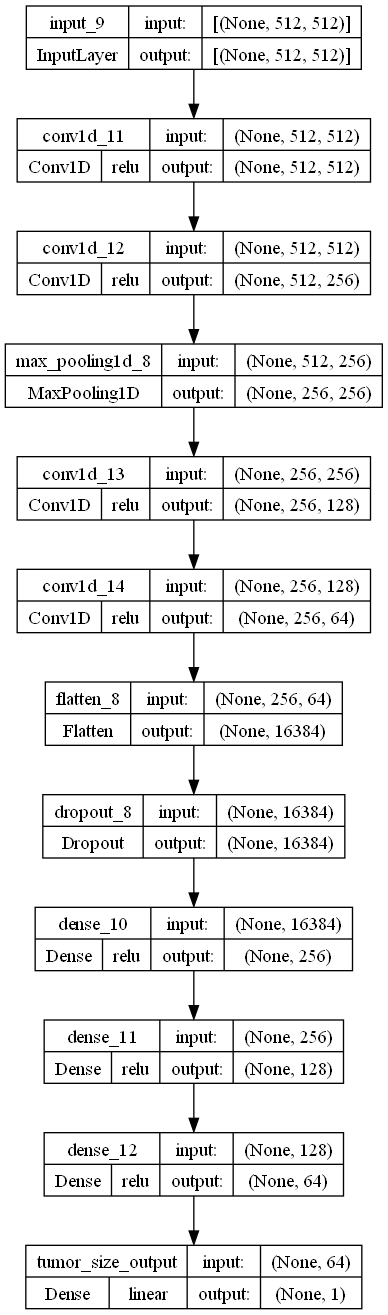

In [119]:
# Instantiate the model based on the Neural Network for regressions
model_regression = functions_project.create_regression_model(model_name_regression, input_shape_regression, filters_regression)

# Show the structure of the model
plot_model(model_regression, model_name_regression + ".png", show_shapes=True, show_layer_activations = True)


## Model training

In [38]:
# Train for the regression data
hist_reg = functions_project.train_model(model_regression, metrics_regression, loss_regression, optimizer_regression, monitor_regression, train_ds_reg, test_ds_reg,
                       epochs_regression, batch_size_regression, steps_per_epcoh_regression, patience_regression)

Epoch 1/40
6/6 [==============================] - 17s 2s/step - loss: 6.6970 - mae: 5.5853 - val_loss: 3.4350 - val_mae: 2.3188
Epoch 2/40
6/6 [==============================] - 9s 2s/step - loss: 2.9563 - mae: 1.8370 - val_loss: 4.2232 - val_mae: 3.1006
Epoch 3/40
6/6 [==============================] - 9s 2s/step - loss: 2.5487 - mae: 1.4250 - val_loss: 1.8484 - val_mae: 0.7241
Epoch 4/40
6/6 [==============================] - 8s 1s/step - loss: 1.7739 - mae: 0.6499 - val_loss: 1.8495 - val_mae: 0.7267
Epoch 5/40
6/6 [==============================] - 7s 1s/step - loss: 2.0178 - mae: 0.8965 - val_loss: 1.8402 - val_mae: 0.7214
Epoch 6/40
6/6 [==============================] - 8s 1s/step - loss: 2.0219 - mae: 0.9053 - val_loss: 1.8409 - val_mae: 0.7276
Epoch 7/40
6/6 [==============================] - 8s 1s/step - loss: 1.7480 - mae: 0.6373 - val_loss: 1.8239 - val_mae: 0.7170
Epoch 8/40
6/6 [==============================] - 8s 1s/step - loss: 1.8787 - mae: 0.7747 - val_loss: 1.8251 -

## Model testing

In [41]:
# Predict for the test set for the regression model
pred_nn_reg = model_regression.predict(test_ds_reg.batch(32))

11/11 [==============================] - 5s 386ms/step


# Results regression Neural Network
In this paragraph, the results for the regression Neural Network will be shown. This will mainly focus on the Mean Absolute Error(MAE) and Loss curve.

## Mean Absolute Error

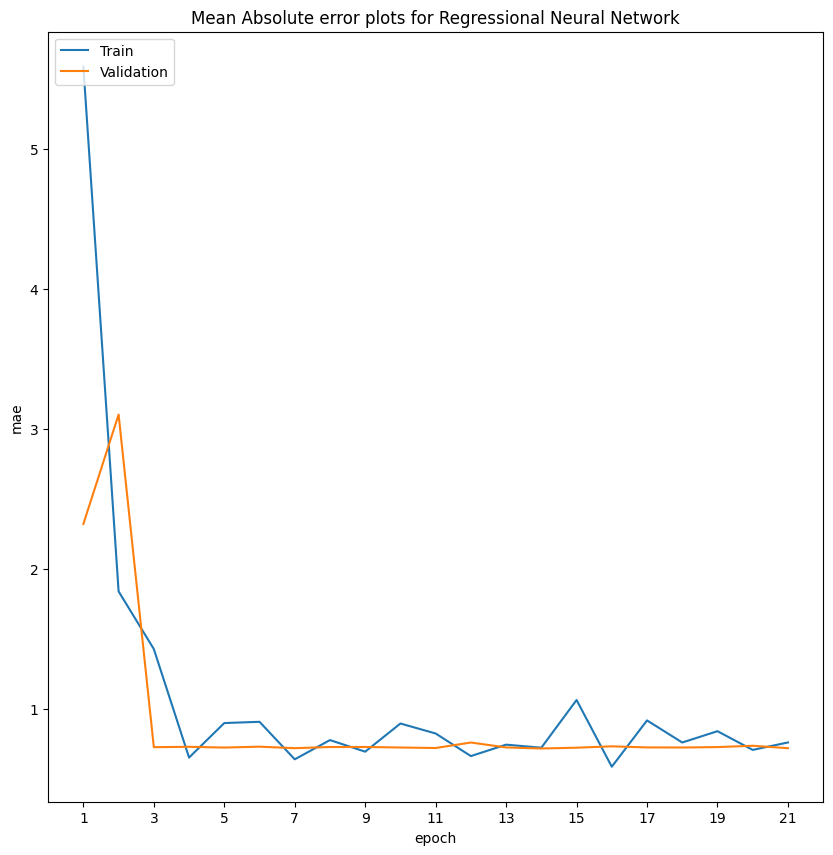

In [130]:
# Set parameters for MAE plot for the regression predictions
y_mae_reg = hist_reg.history['mae']
y_mae_val_reg = hist_reg.history['val_mae']
title_reg = "Mean Absolute error plots for Regressional Neural Network"
ylabel = "mae"
figsize_reg = (10, 10)

# Summarize the historday for accuracy using the plot_accuracy function
functions_project.plot_accuracy(y_mae_reg, y_mae_val_reg, title_reg, ylabel, figsize_reg)

### Findings
In the end, the Mean Absolute Error was 0.7169. Although that seems like a great score, it is generally speaking difficult to interpret what a good MAE score is. If we look more into the progress, for both the train and validation data there has been some learning in the curve. Thus, we can conclude that our model is learning from the data and can give some confident estimations of the tumor size.

## Loss curve

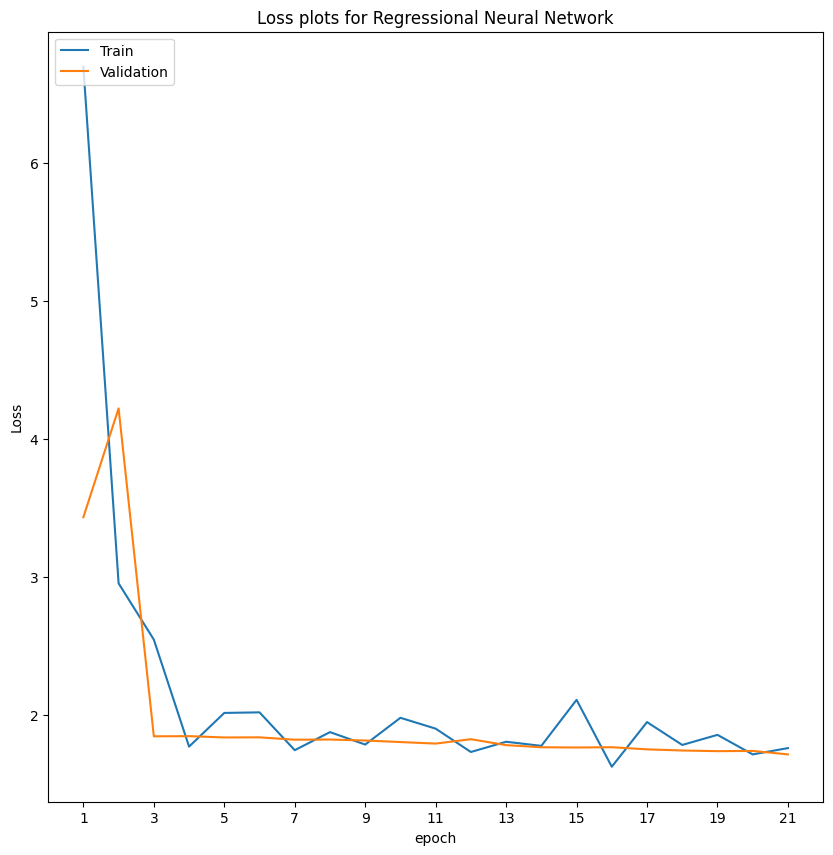

In [129]:
# Set parameters for loss plot for the regression predictions
y_mae_reg_loss = hist_reg.history['loss']
y_mae_val_reg_loss = hist_reg.history['val_loss']
title_reg_loss = "Loss plots for Regressional Neural Network"
ylabel = "Loss"
figsize_reg = (10, 10)

# Summarize the historday for accuracy using the plot_accuracy function
functions_project.plot_accuracy(y_mae_reg_loss, y_mae_val_reg_loss, title_reg_loss, ylabel, figsize_reg)

### Findings
Looking at the graph, the progress of the loss curve looks quite similar to that of the Mean Absolute Error score. What we can further see is that there are some gaps between the Train and Validation dataset, but it does not differentiate that great from one another. Therefore, we can conclude that the model is a good fit for the data applied.

## Other metrics
To add additional metrics to our results, we will print out a few regression related metrics. These will be:
- Explained variance
- R2 score
- MAE
- Mean Squared error
- Root Mean Squared error 

In [61]:
# Call the regression_results funciton to display the results of the Regression Neural Network
functions_project.regression_results(y_test_reg, pred_nn_reg)

Explained_variance score for Regression Neural Network: 0.00
R2 score for Regression Neural Network: -0.0373
Mean absolute error score for Regression Neural Network: 0.7169
Mean Squared error for Regression Neural Network: 1.0212
Root Mean Squared error for Regression Neural Network: 1.0105


# Conclusion
For the final algorithm, we wanted to predict the size of the tumor for the cancer patient. For that purpose, we wanted to have a Mean Absolute Score that was as low as possible. Although determining a satisfactory MAE score is generally challenging, when we further examine the learning curve for both the training and validation data, it is evident that progress has been made. Consequently, we can infer that our model is effectively learning from the data and providing reliable estimations of tumor size.